# Hooke's law - interpolation and fit

This notebook is used for analysis of Hooke's law data from the first Tier 1 lab of Phys 5BL.

In [34]:
import numpy as np
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Input data
#### CSV files
The iOLab data is output from the online repository as a single CSV file, with the selected variables (time, position, Force) in the columns. The different sensor data has all been interpolated to a common time, which is whatever was uploaded from the iOLab software to the online repository.


## Look at data
Check the headers and data

In [35]:
file = open('0deg.csv', 'r')
print(file.read())

Time (s),Fáµ§ (N),ráµ§ (m)
0.009999999776482582,0.7190972566604614,0
0.019999999552965164,0.7174999713897705,0
0.029999999329447746,0.715833306312561,0
0.03999999910593033,0.7150000333786011,0
0.05000000074505806,0.7166666388511658,0
0.05999999865889549,0.7166666388511658,0
0.07000000029802322,0.7166666388511658,0
0.07999999821186066,0.7166666388511658,0
0.09000000357627869,0.7166666388511658,0
0.10000000149011612,0.7174999713897705,0
0.10999999940395355,0.7199999094009399,0
0.11999999731779099,0.7199999690055847,0
0.12999999523162842,0.7174999713897705,0
0.14000000059604645,0.7174999713897705,0
0.15000000596046448,0.71916663646698,0
0.1599999964237213,0.7208333611488342,0
0.17000000178813934,0.7200000286102295,0
0.18000000715255737,0.71833336353302,0
0.1899999976158142,0.7166666388511658,0
0.20000000298023224,0.7174999713897705,0
0.20999999344348907,0.71833336353302,0
0.2199999988079071,0.7191666960716248,0
0.23000000417232513,0.71833336353302,0
0.23999999463558197,0.71833336353302,0


In [36]:
# Loading data for CSV files
# The index for the measurement + time should be checked against the raw csv.
# (Remember that python indexing starts at 0)

# Input the data into arrays. You might also want to look at the wheel output, to better choose the quietest sensor
tx, Fdata, pos_data  = np.loadtxt("0deg.csv", delimiter=",", skiprows=1, usecols=(0,1,2), unpack=True)


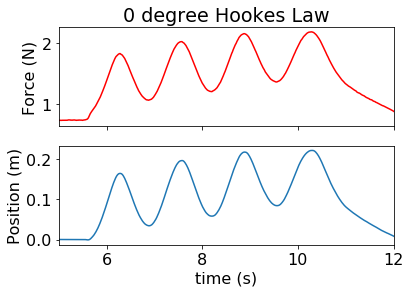

In [54]:
# Two subplots, the axes array is shared
# Choose the sensor for fitting.
f, axarr = plt.subplots(2, sharex=True)
plt.xlim(5.0, 12)
axarr[0].plot(tx, Fdata,'r')
axarr[0].set_title('0 degree Hookes Law')
axarr[0].set_ylabel('Force (N)')
axarr[1].plot(tx, pos_data)
axarr[1].set_xlabel('time (s)')
axarr[1].set_ylabel('Position (m)')
plt.show()

# Select region to fit

In [58]:
# Examine the plot and pick one region. You should interatively plot the regions and fit
# Or, choose the region from the ioLab software parametric plot
start_time = 5.7
stop_time = 6.2
in_range = (tx >= start_time) & (tx <= stop_time)
pos_sliced, F_sliced = pos_data[in_range], Fdata[in_range]

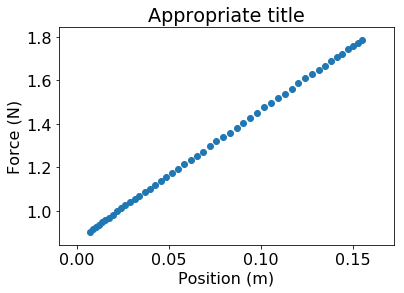

In [64]:
#plt.scatter(x_vals, F_vals)
plt.scatter(pos_sliced, F_sliced)
#plt.xlim(5.7, 6.25)
plt.xlabel("Position (m)")
plt.ylabel("Force (N)")
plt.title ('Appropriate title')
plt.show()

# Fit

In [69]:
# Defines the linear function for fitting Hooke's law
def f_lin(x, m, b):
    return m*x + b

In [70]:
# Does the fit
lin_opt, lin_cov = opt.curve_fit(f_lin, pos_sliced, F_sliced)

# Best fit values
m, b = lin_opt
dm, db = np.sqrt(np.diag(lin_cov))

print("m = %5.4f \u00b1 %5.4f" % (m, dm))
print("b = %5.4f \u00b1 %5.4f" % (b, db))

m = 5.9434 ± 0.0075
b = 0.8676 ± 0.0007


In [71]:
# Predicted values of F from the best-fit model
F_pred = f_lin(pos_sliced, m, b)

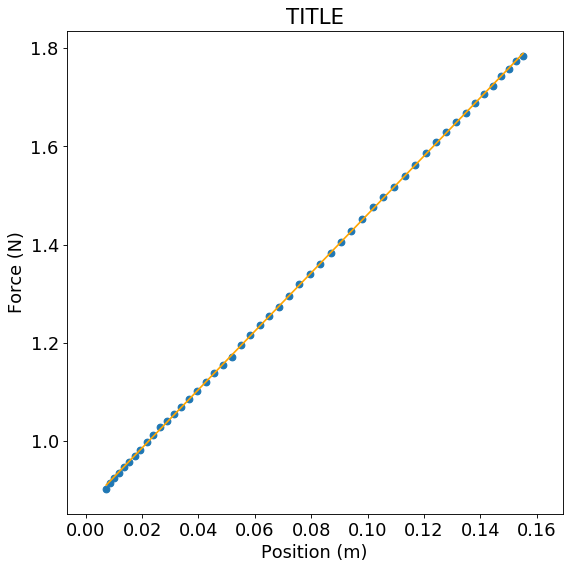

In [72]:
# Sets figure size etc.
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

plt.scatter(pos_sliced, F_sliced)
plt.plot(pos_sliced, F_pred, color='orange')

plt.title("TITLE")
plt.xlabel("Position (m)")
plt.ylabel("Force (N)")
plt.show()

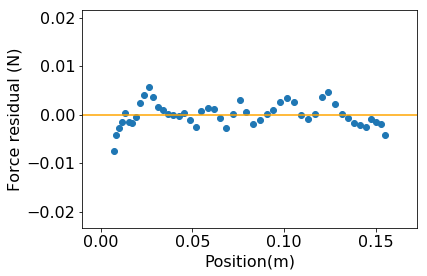

In [73]:
# Plot of residuals
plt.scatter(pos_sliced, F_sliced-F_pred)
plt.axhline(y=0, color='orange')
plt.xlabel("Position(m)")
plt.ylabel("Force residual (N)")
plt.show()